<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>Assignment - 7: Word2Vec</h2>

<h3 style = 'color:lightgreen'>Assignment - 7.0 Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
from gensim.models import Word2Vec, KeyedVectors

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import tensorflow as tf
import tensorflow_hub as hub
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [2]:
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stop words list
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3 style = 'color:lightgreen'>7.1 GoogleNews - Vector Math</h3>

In [3]:
path = r'D:\Documents\Education\UC San Diego\10. NLP\3. Data\Google News\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=500000)

In [4]:
def find_most_similar(vec, topn=10):
    """
    Find the most similar words to the given vector.
    
    
    :param vec: Vector to find most similar words to.
    :param topn: Number of most similar words to return.
    
    :return: List of most similar words to the given vector.
    """
    return model.most_similar([vec], topn=topn)[1:]

In [5]:
find_most_similar(model['Marie_Curie'] - model['physics'] + model['politics'])

[('politics', 0.4568769037723541),
 ('Mowlam', 0.40961188077926636),
 ('Sue_Ryder', 0.4075208306312561),
 ('Breast_Cancer_Campaign', 0.39671528339385986),
 ('Mo_Mowlam', 0.37945008277893066),
 ('Breakthrough_Breast_Cancer', 0.37573352456092834),
 ('WRVS', 0.3747096359729767),
 ('CLIC_Sargent', 0.37424948811531067),
 ('Margaret_Thatcher', 0.3684638738632202)]

In [6]:
find_most_similar(model['Cowboys'] - model['Dallas'] + model['Miami'])

[('Dolphins', 0.7073556184768677),
 ('Miami_Dolphins', 0.6461876034736633),
 ('Broncos', 0.6419293284416199),
 ('Seminoles', 0.6188381910324097),
 ('Gators', 0.6109528541564941),
 ('Hokies', 0.5927007794380188),
 ('Dallas_Cowboys', 0.5866430401802063),
 ('Sooners', 0.586640477180481),
 ('Cleveland_Browns', 0.5844414234161377)]

In [7]:
find_most_similar(model['Sacramento'] - model['California'] + model['Colorado'])

[('Colorado', 0.7621334791183472),
 ('Sacramento', 0.7206397652626038),
 ('Grand_Junction', 0.6696534752845764),
 ('Fort_Collins', 0.6669073104858398),
 ('Boulder', 0.6501880288124084),
 ('Colorado_Springs', 0.6477944850921631),
 ('Pueblo', 0.6256301403045654),
 ('Spokane', 0.6246553063392639),
 ('Gunnison', 0.6222273111343384)]

In [8]:
find_most_similar(model['Cowboys'] - model['Dallas'] + model['San_Francisco'])

[('Giants', 0.6826241612434387),
 ('Niners', 0.6466033458709717),
 ('##ers', 0.6438729166984558),
 ('San_Francisco_##ers', 0.6088259816169739),
 ('Oakland_Raiders', 0.6043735146522522),
 ('Broncos', 0.5943415760993958),
 ('Raiders', 0.5565468072891235),
 ('Seahawks', 0.5484771728515625),
 ('Dallas_Cowboys', 0.5368008613586426)]

<h3 style = 'color:lightgreen'>7.2 GoogleNews - Compute Similarity</h3>

In [9]:
def computeSimilarity(words: list) -> np.ndarray:
    similarity_between_words = np.zeros((len(words), len(words))) # Create a matrix to store the similarity between words
    for i in range(len(words)):
        for j in range(len(words)):
            similarity_between_words[i, j] = model.similarity(words[i], words[j])
    return similarity_between_words

In [10]:
similarity_matrix = computeSimilarity(['beautiful', 'gorgeous', 'dazzling', 'splendid', 'magnificient', 'ugly'])
df = pd.DataFrame(similarity_matrix, columns = ['beautiful', 'gorgeous', 'dazzling', 'splendid', 'magnificient', 'ugly'],
                  index = ['beautiful', 'gorgeous', 'dazzling', 'splendid', 'magnificient', 'ugly'])
df

,beautiful,gorgeous,dazzling,splendid,magnificient,ugly
beautiful,1.000000,0.835300,0.479497,0.553344,0.492378,0.334443
gorgeous,0.835300,1.000000,0.529788,0.550633,0.423641,0.298337
dazzling,0.479497,0.529788,1.000000,0.661542,0.449416,0.216860
splendid,0.553344,0.550633,0.661542,1.000000,0.595924,0.224971
magnificient,0.492378,0.423641,0.449416,0.595924,1.000000,0.170645
ugly,0.334443,0.298337,0.216860,0.224971,0.170645,1.000000


<h3 style = 'color:lightgreen'>7.3 GoogleNews - Compute Similarity</h3>

In [11]:
similarity_matrix = computeSimilarity(['false', 'fake', 'fradulent', 'counterfeit', 'spurious', 'true'])
df = pd.DataFrame(similarity_matrix, columns = ['false', 'fake', 'fradulent', 'counterfeit', 'spurious', 'true'],
                  index = ['false', 'fake', 'fradulent', 'counterfeit', 'spurious', 'true'])
df

,false,fake,fradulent,counterfeit,spurious,true
false,1.000000,0.555666,0.509870,0.329798,0.537212,0.370943
fake,0.555666,1.000000,0.513419,0.613547,0.433471,0.280526
fradulent,0.509870,0.513419,1.000000,0.428285,0.377630,0.211092
counterfeit,0.329798,0.613547,0.428285,1.000000,0.321455,0.156603
spurious,0.537212,0.433471,0.377630,0.321455,1.000000,0.282308
true,0.370943,0.280526,0.211092,0.156603,0.282308,1.000000


<h3 style = 'color:lightgreen'>7.4 Compute Similarity between Coke & Pepsi</h3>

In [12]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [13]:
# Function to compute cosine similarity
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    similarity = dot_product / (norm_v1 * norm_v2)
    return similarity

In [14]:
# Obtain embeddings for "Coke" and "Pepsi"
coke_embedding = embed(["Coke"])[0]
pepsi_embedding = embed(["Pepsi"])[0]

# Compute similarity
similarity = cosine_similarity(coke_embedding, pepsi_embedding)
print("Similarity between 'Coke' and 'Pepsi':", similarity)

Similarity between 'Coke' and 'Pepsi': 0.62521565


<h3 style = 'color:lightgreen'>7.5 Compute Skip-Ngram</h3>

In [15]:
corpus = ['data science professionals have promising career path']
corpus = [word.lower() for word in corpus]
corpus

['data science professionals have promising career path']

In [16]:
target_words = []
for sentence in corpus:
    word_tokenized = nltk.word_tokenize(sentence)
    filtered_words = [word for word in word_tokenized if word not in stop_words]
    target_words.append(filtered_words)

# target_words = set(target_words)
print(target_words)

[['data', 'science', 'professionals', 'promising', 'career', 'path']]


In [17]:
def flatten_comprehension(matrix):
    flattened_list = [item for row in matrix for item in row]
    flattened_list = sorted(set(flattened_list))
    return [_ for _ in flattened_list]

flattened_list = flatten_comprehension(target_words)
print(f"There are {len(flattened_list)} unique words in the corpus and these are: {flattened_list}")

There are 6 unique words in the corpus and these are: ['career', 'data', 'path', 'professionals', 'promising', 'science']


In [30]:
# Generate Skip-Ngrams: Window size = 1

WINDOW_SIZE = 1

word2int = {word: i for i, word in enumerate(flattened_list)} # Create a dictionary to map words to integers

sentences = []
for sentence in [' '.join(sentence) for sentence in target_words]: # Creates a list of sentences from a list of lists
    sentences.append(sentence.split())

skipNgram_data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                skipNgram_data.append([word, neighbor])

# Convert skipNgram_data into a DataFrame

skipNgram_df_1 = pd.DataFrame(skipNgram_data, columns=['word', 'label'])
skipNgram_df_1

,word,label
0,data,science
1,science,data
2,science,professionals
3,professionals,science
4,professionals,promising
5,promising,professionals
6,promising,career
7,career,promising
8,career,path
9,path,career


In [31]:
# Generate Skip-Ngrams: Window size = 2

WINDOW_SIZE = 2

word2int = {word: i for i, word in enumerate(flattened_list)} # Create a dictionary to map words to integers

sentences = []
for sentence in [' '.join(sentence) for sentence in target_words]: # Creates a list of sentences from a list of lists
    sentences.append(sentence.split())

skipNgram_data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                skipNgram_data.append([word, neighbor])

# Convert skipNgram_data into a DataFrame

skipNgram_df_2 = pd.DataFrame(skipNgram_data, columns=['word', 'label'])
skipNgram_df_2

,word,label
0,data,science
1,data,professionals
2,science,data
3,science,professionals
4,science,promising
5,professionals,data
6,professionals,science
7,professionals,promising
8,professionals,career
9,promising,science


In [32]:
# Generate Skip-Ngrams: Window size = 3

WINDOW_SIZE = 3

word2int = {word: i for i, word in enumerate(flattened_list)} # Create a dictionary to map words to integers

sentences = []
for sentence in [' '.join(sentence) for sentence in target_words]: # Creates a list of sentences from a list of lists
    sentences.append(sentence.split())

skipNgram_data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                skipNgram_data.append([word, neighbor])

# Convert skipNgram_data into a DataFrame

skipNgram_df_3 = pd.DataFrame(skipNgram_data, columns=['word', 'label'])
skipNgram_df_3

,word,label
0,data,science
1,data,professionals
2,data,promising
3,science,data
4,science,professionals
5,science,promising
6,science,career
7,professionals,data
8,professionals,science
9,professionals,promising


<h3 style = 'color:lightgreen'>7.6 One-Hot Encoding</h3>

In [28]:
ONE_HOT_ENCODING = len(flattened_list)

In [29]:
def one_hot_encoder(x):
    one_hot = np.zeros(ONE_HOT_ENCODING)
    one_hot[x] = 1
    return one_hot

In [33]:
X = []
Y = []

for x, y in zip(skipNgram_df_2['word'], skipNgram_df_2['label']):
    X.append(one_hot_encoder(word2int[x]))
    Y.append(one_hot_encoder(word2int[y]))

# Convert X and y into numpy arrays
X_train = np.asarray(X)
y_train = np.asarray(Y)

In [34]:
X_train.shape, y_train.shape

((18, 6), (18, 6))

In [35]:
X_train

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [36]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

<h3 style = 'color:lightgreen'>7.7 Deep Learning Model for Word2Vec</h3>

In [38]:
corpus = [
     'I like deep learning', 
     'I like NLP', 
     'I enjoy flying'
]
corpus = [word.lower() for word in corpus]
corpus

['i like deep learning', 'i like nlp', 'i enjoy flying']

In [39]:
target_words = []
for sentence in corpus:
    word_tokenized = nltk.word_tokenize(sentence)
    filtered_words = [word for word in word_tokenized if word not in stop_words]
    target_words.append(filtered_words)

# target_words = set(target_words)
print(target_words)

[['like', 'deep', 'learning'], ['like', 'nlp'], ['enjoy', 'flying']]


In [41]:
flattened_list = flatten_comprehension(target_words)
print(f"There are {len(flattened_list)} unique words in the corpus and these are: {flattened_list}")

There are 6 unique words in the corpus and these are: ['deep', 'enjoy', 'flying', 'learning', 'like', 'nlp']


In [42]:
# Generate Skip-Ngrams

word2int = {word: i for i, word in enumerate(flattened_list)} # Create a dictionary to map words to integers

sentences = []
for sentence in [' '.join(sentence) for sentence in target_words]: # Creates a list of sentences from a list of lists
    sentences.append(sentence.split())

WINDOW_SIZE = 2

skipNgram_data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                skipNgram_data.append([word, neighbor])

In [43]:
skipNgram_df = pd.DataFrame(skipNgram_data, columns=['word', 'neighbor'])
skipNgram_df.head(10)

,word,neighbor
0,like,deep
1,like,learning
2,deep,like
3,deep,learning
4,learning,like
5,learning,deep
6,like,nlp
7,nlp,like
8,enjoy,flying
9,flying,enjoy


In [44]:
ONE_HOT_ENCODING = len(flattened_list)

In [45]:
# Generate Data
X = []
Y = []

for x, y in zip(skipNgram_df['word'], skipNgram_df['neighbor']):
    X.append(one_hot_encoder(word2int[x]))
    Y.append(one_hot_encoder(word2int[y]))

# Convert X and y into numpy arrays
X_train = np.asarray(X)
y_train = np.asarray(Y)

In [46]:
X_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [47]:
model = Sequential()
model.add(Dense(2, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 14        
                                                                 
 dense_1 (Dense)             (None, 6)                 18        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [48]:
epochs = 20000
history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

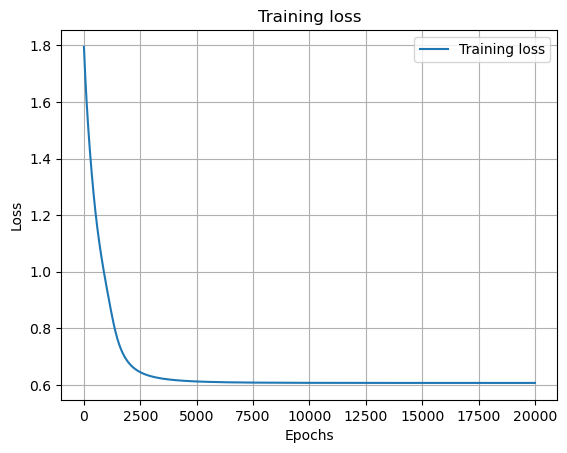

In [49]:
# Visualize loss
train_loss = history.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss, label='Training loss')

plt.figure(1, figsize=(7, 5))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.grid(True)
plt.legend()
plt.style.use(['ggplot'])

In [50]:
# Print Weights and Biases

for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    break

print(weights)
print(biases)

[[ 0.01242923  1.2744362 ]
 [ 3.692731    3.3622408 ]
 [ 4.475834   -3.9018946 ]
 [-4.9853272   0.8063006 ]
 [-0.47582376 -1.5943391 ]
 [-2.833599    2.7037933 ]]
[-0.7472823  -0.06223788]


In [51]:
Word2Vec = weights + biases
print(Word2Vec)

[[-0.7348531  1.2121984]
 [ 2.9454486  3.3000028]
 [ 3.7285516 -3.9641325]
 [-5.7326097  0.7440627]
 [-1.2231061 -1.656577 ]
 [-3.5808814  2.6415553]]


In [52]:
w2v_df = pd.DataFrame(Word2Vec, columns=['x1', 'x2'])
w2v_df['word'] = flattened_list
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,deep,-0.734853,1.212198
1,enjoy,2.945449,3.300003
2,flying,3.728552,-3.964133
3,learning,-5.732610,0.744063
4,like,-1.223106,-1.656577
5,nlp,-3.580881,2.641555


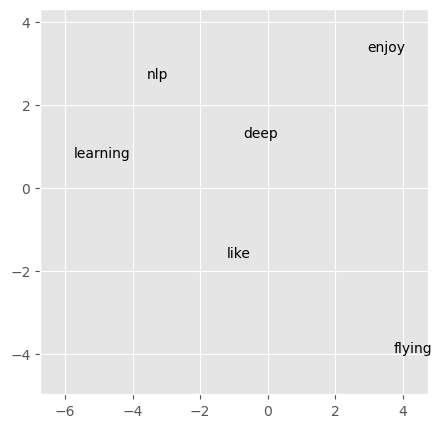

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(Word2Vec, axis=0)[0] - PADDING
y_axis_min = np.amin(Word2Vec, axis=0)[1] - PADDING
x_axis_max = np.amax(Word2Vec, axis=0)[0] + PADDING
y_axis_max = np.amax(Word2Vec, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)

plt.show()